In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
#print(iris)

X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)
print(y)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


<ipython-input-4-caab20a6327c>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


array([0])

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt
import pandas as pd

In [3]:
tf.__version__

'2.9.2'

In [4]:
keras.__version__

'2.9.0'

#Fashion MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [13]:
# create the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [17]:
model.layers[1].name

'dense_3'

In [18]:
model.get_layer("dense_3").name

'dense_3'

In [23]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[-0.05424713, -0.02702442, -0.06781258, ..., -0.06323898,
         0.07079239, -0.04866841],
       [-0.04064858,  0.05567862, -0.05768991, ..., -0.0267485 ,
        -0.00903562, -0.03855296],
       [ 0.02413304, -0.01470903,  0.02119732, ..., -0.03116408,
         0.04021037, -0.04531454],
       ...,
       [-0.03800992, -0.06172262,  0.04854923, ..., -0.05427798,
         0.02665199, -0.06746382],
       [-0.06699397, -0.02380679, -0.05190894, ...,  0.00404269,
         0.00652348, -0.01253046],
       [-0.06547088, -0.06996856,  0.02516774, ..., -0.0592663 ,
        -0.02084396, -0.01736039]], dtype=float32)

In [25]:
biases.shape

(300,)

In [26]:
# compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd", 
              metrics = ["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2227 - accuracy: 0.9190 - val_loss: 0.3133 - val_accuracy: 0.8870
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2182 - accuracy: 0.9220 - val_loss: 0.3098 - val_accuracy: 0.8902
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2146 - accuracy: 0.9235 - val_loss: 0.3045 - val_accuracy: 0.8898
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2116 - accuracy: 0.9237 - val_loss: 0.2900 - val_accuracy: 0.8958
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2081 - accuracy: 0.9254 - val_loss: 0.2903 - val_accuracy: 0.8926
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2047 - accuracy: 0.9265 - val_loss: 0.2851 - val_accuracy: 0.8932
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2020 - accuracy: 0.9269 - val_loss: 0.2874 - val_accuracy:

In [30]:
history.history

{'loss': [0.22268235683441162,
  0.2181531935930252,
  0.21457047760486603,
  0.21160633862018585,
  0.20808649063110352,
  0.20474028587341309,
  0.20199015736579895,
  0.19855785369873047,
  0.19436129927635193,
  0.19155575335025787,
  0.18928678333759308,
  0.1851281225681305,
  0.1807420253753662,
  0.17960359156131744,
  0.17702634632587433,
  0.17436012625694275,
  0.17109881341457367,
  0.16775836050510406,
  0.16575956344604492,
  0.1642991453409195,
  0.16045357286930084,
  0.1580309420824051,
  0.15466995537281036,
  0.15293379127979279,
  0.15138955414295197,
  0.14671292901039124,
  0.14624592661857605,
  0.14331740140914917,
  0.14077065885066986,
  0.13925917446613312],
 'accuracy': [0.9189817905426025,
  0.9220181703567505,
  0.9234727025032043,
  0.9237090945243835,
  0.9254181981086731,
  0.9264909029006958,
  0.9268545508384705,
  0.9298545718193054,
  0.9301272630691528,
  0.9318727254867554,
  0.932418167591095,
  0.9343090653419495,
  0.9363636374473572,
  0.93514

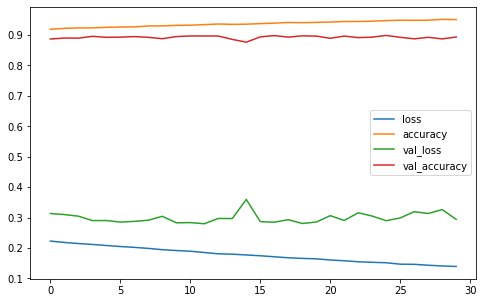

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
#plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 61.6616 - accuracy: 0.8671


[61.6616325378418, 0.8671000003814697]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 174ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
import numpy as np
y_predict = np.argmax(model.predict(X_new), axis=-1)
y_predict
np.array(class_names)[y_predict]

1/1 [==============================] - 0s 36ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

#Regression MLP

In [40]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6926 - val_loss: 0.4600
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4937 - val_loss: 0.4541
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4337 - val_loss: 0.4707
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4008
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - val_loss: 0.3823
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3758
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3795 - val_loss: 0.3786
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3765 - val_loss: 0.3714
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3764 - val_loss: 0.4137
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.3614

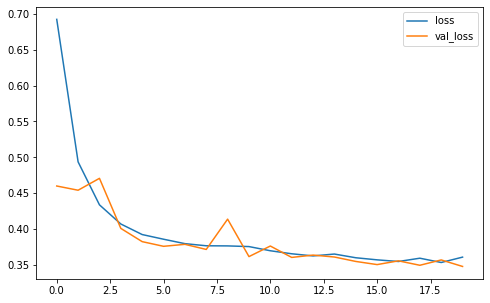

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 

In [46]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 19ms/step


array([[172.87744],
       [186.39146],
       [180.76282]], dtype=float32)

In [61]:
y_test[:3]

array([2.25 , 0.993, 1.396])

#Wide and deep Neural Network

In [57]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [58]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7516 - val_loss: 0.4757
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4670 - val_loss: 0.4574
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.4032
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3914 - val_loss: 0.4416
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3804 - val_loss: 0.3824
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4360 - val_loss: 1.0335
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4461 - val_loss: 0.6369
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3713 - val_loss: 0.3616
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3641 - val_loss: 0.8692
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.5519

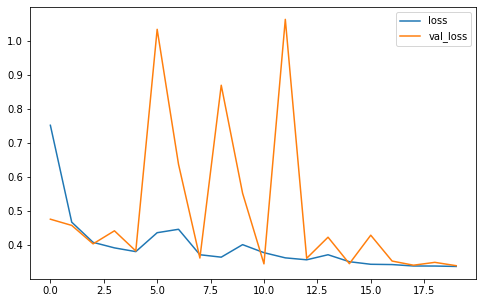

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 

In [60]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 78ms/step


array([[113.3494  ],
       [117.895386],
       [116.480736]], dtype=float32)

In [64]:
# save a model
# model’s architecture (every layer’s hyperparame‐ ters)
# value of all the model parameters for every layer (connection weights and biases)
# optimizer (hyperparameters and any state it may have)

model.save("my_keras_model.h5")

In [63]:
# load a model
model = keras.models.load_model("my_keras_model.h5")


In [65]:
# saves checkpoints of your model at regular intervals during training, by default at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5") 
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: nan


In [ ]:
# it will only save your model when its performance on the validation set is the best so far
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")

In [ ]:
# It will interrupt training when it measures no progress on the validation set 
# for a number of epochs (defined by the patience argument), and it will optionally 
# roll back to the best model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                      restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# TensorBoard

In [66]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir(): 
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
  return os.path.join(root_logdir, run_id)

In [69]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_01_29-22_37_16'

In [71]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) 
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] - 1s 2

In [ ]:
!tensorboard --logdir=./my_logs --port=6006

In [75]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]): 
  model = keras.models.Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
              model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
  options = {} 
  model.add(keras.layers.Dense(1, **options)) 
  optimizer = keras.optimizers.SGD(learning_rate) 
  model.compile(loss="mse", optimizer=optimizer) 
  return model

In [76]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg

<ipython-input-76-9dabefbb1669>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

# Tuning hiperparametros

In [78]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/ste

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8eed70d220>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ef3ed1ac0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
rnd_search_cv.best_params_


In [ ]:
model = rnd_search_cv.best_estimator_.model